<a href="https://colab.research.google.com/github/ankitg-02/customer_analysis/blob/main/quantium_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#importing data from transaction excelsheet
transaction=pd.read_excel("/content/QVI_transaction_data.xlsx")
#importing data from puchase behaviour csv file
purchase_behaviour=pd.read_csv("/content/QVI_purchase_behaviour.csv")

In [3]:
#dataset for the transaction
transaction_data=pd.DataFrame(transaction)



In [4]:
#checking the null values in transaction dataset
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [5]:
#checking the data types of attributes in transaction dataset
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [28]:
#getting the information of thr transaction dataset
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [17]:
#getting the unique values of each attribute of the transaction dataset
for i in transaction_data.columns:
  print(i,':','\n',transaction_data[i].unique())

DATE : 
 [43390 43599 43605 43329 43330 43604 43601 43332 43602 43603 43600 43326
 43328 43331 43327 43633 43348 43370 43523 43543 43632 43429 43414 43533
 43405 43537 43561 43311 43391 43409 43528 43535 43576 43468 43366 43624
 43313 43448 43587 43474 43566 43529 43369 43554 43519 43451 43564 43563
 43382 43407 43489 43510 43627 43284 43299 43309 43552 43593 43611 43526
 43578 43584 43357 43494 43547 43550 43318 43467 43555 43294 43386 43496
 43504 43520 43583 43321 43446 43568 43643 43646 43287 43562 43423 43434
 43479 43333 43508 43634 43436 43458 43463 43579 43620 43622 43345 43361
 43482 43617 43625 43288 43352 43360 43404 43290 43323 43363 43399 43402
 43551 43556 43365 43367 43439 43518 43539 43639 43292 43395 43450 43462
 43503 43336 43375 43381 43534 43644 43295 43509 43325 43400 43443 43502
 43607 43302 43387 43412 43536 43424 43499 43515 43608 43308 43428 43484
 43316 43470 43572 43355 43481 43571 43344 43590 43475 43507 43641 43531
 43430 43389 43438 43306 43408 43419 43615

In [18]:
#getting all the statistical details of the transcation dataset
transaction_data.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


In [29]:
#-------------------------CHIPS PRODUCTS----------------------------#
#Company Name="Cobs"
# count of chips item in prod_name=Cobs Popd Sea Salt Chips 110g column in transaction data
count_for_chips_1=0
for i in transaction_data["PROD_NAME"]:
  if i=="Cobs Popd Sea Salt  Chips 110g" :
    count_for_chips_1+=1
# count of chips item in prod_name=Cobs Popd Sour Crm &Chives Chips 110g column in transaction data
count_for_chips_2=0
for i in transaction_data["PROD_NAME"]:
  if i=="Cobs Popd Sour Crm  &Chives Chips 110g":
    count_for_chips_2+=1
# count of chips item in prod_name=Cobs Popd Swt/Chlli &Sr/Cream Chips 110g column in transaction data
count_for_chips_3=0
for i in transaction_data["PROD_NAME"]:
  if i=="Cobs Popd Swt/Chlli &Sr/Cream Chips 110g":
    count_for_chips_3+=1
count_for_Cobs=count_for_chips_1+count_for_chips_2+count_for_chips_3
print("count for Cobs chips=",count_for_Cobs)

#Company Name="Doritos"
# count of chips item in prod_name=Doritos Corn Chips  Cheese Supreme 170g column in transaction data
count_for_chips_4=0
for i in transaction_data["PROD_NAME"]:
  if i=="Doritos Corn Chips  Cheese Supreme 170g":
    count_for_chips_4+=1
# count of chips item in prod_name=Doritos Corn Chips  Nacho Cheese 170g column in transaction data
count_for_chips_5=0
for i in transaction_data["PROD_NAME"]:
  if i=="Doritos Corn Chips  Nacho Cheese 170g":
    count_for_chips_5+=1
# count of chips item in prod_name=Doritos Corn Chips  Original 170g column in transaction data
count_for_chips_6=0
for i in transaction_data["PROD_NAME"]:
  if i=="Doritos Corn Chips  Original 170g":
    count_for_chips_6+=1
count_for_Doritos=count_for_chips_4+count_for_chips_5+count_for_chips_6
print("count for Doritos product=",count_for_Doritos)
#Unique Product="French Fries"
# count of chips item in prod_name=French Fries Potato Chips 175g column in transaction data
count_for_chips_7=0
for i in transaction_data["PROD_NAME"]:
  if i=="French Fries Potato Chips 175g":
    count_for_chips_7+=1
print("count for French Fries chips=",count_for_chips_7)

#Company Name="Smiths"
# count of chips item in prod_name=Smiths Crinkle Chips Salt & Vinegar 330g column in transaction data
count_for_chips_8=0
for i in transaction_data["PROD_NAME"]:
  if i=="Smiths Crinkle Chips Salt & Vinegar 330g":
    count_for_chips_8+=1
# count of chips item in prod_name=Smiths Crinkle Cut  Chips Barbecue 170g column in transaction data
count_for_chips_9=0
for i in transaction_data["PROD_NAME"]:
  if i=="Smiths Crinkle Cut  Chips Barbecue 170g":
    count_for_chips_9+=1
# count of chips item in prod_name=Smiths Crinkle Cut  Chips Chicken 170g column in transaction data
count_for_chips_10=0
for i in transaction_data["PROD_NAME"]:
  if i=="Smiths Crinkle Cut  Chips Chicken 170g":
    count_for_chips_10+=1
# count of chips item in prod_name=Smiths Crinkle Cut  Chips Chs&Onion170g column in transaction data
count_for_chips_11=0
for i in transaction_data["PROD_NAME"]:
  if i=="Smiths Crinkle Cut  Chips Chs&Onion170g":
    count_for_chips_11+=1
# count of chips item in prod_name=Smiths Crinkle Cut  Chips Original 170g column in transaction data
count_for_chips_12=0
for i in transaction_data["PROD_NAME"]:
  if i=="Smiths Crinkle Cut  Chips Original 170g":
    count_for_chips_12+=1
count_for_Smiths=count_for_chips_7+count_for_chips_8+count_for_chips_9+count_for_chips_10+count_for_chips_11+count_for_chips_12
print("count for Smiths chips=",count_for_Smiths)
#Company Name="Thins"
# count of chips item in prod_name=Thins Chips         Originl saltd 175g column in transaction data
count_for_chips_13=0
for i in transaction_data["PROD_NAME"]:
  if i=="Thins Chips         Originl saltd 175g":
    count_for_chips_13+=1
# count of chips item in prod_name=Thins Chips         Originl saltd 175g column in transaction data
count_for_chips_14=0
for i in transaction_data["PROD_NAME"]:
  if i=="Thins Chips         Originl saltd 175g":
    count_for_chips_14+=1
# count of chips item in prod_name=Thins Chips Salt &  Vinegar 175g column in transaction data
count_for_chips_15=0
for i in transaction_data["PROD_NAME"]:
  if i=="Thins Chips Salt &  Vinegar 175g":
    count_for_chips_15+=1
# count of chips item in prod_name=Thins Chips Seasonedchicken 175g column in transaction data
count_for_chips_16=0
for i in transaction_data["PROD_NAME"]:
  if i=="Thins Chips Seasonedchicken 175g":
    count_for_chips_16+=1
# count of chips item in prod_name=Thins Potato Chips  Hot & Spicy 175g column in transaction data
count_for_chips_17=0
for i in transaction_data["PROD_NAME"]:
  if i=="Thins Potato Chips  Hot & Spicy 175g":
    count_for_chips_17+=1
count_for_Thins=count_for_chips_13+count_for_chips_14+count_for_chips_15+count_for_chips_16+count_for_chips_17
print("count for Thins chips=",count_for_Thins)
#Company Name="WW"
# count of chips item in prod_name=WW Original Corn    Chips 200g column in transaction data
count_for_chips_18=0
for i in transaction_data["PROD_NAME"]:
  if i=="WW Original Corn    Chips 200g":
    count_for_chips_18+=1
# count of chips item in prod_name=WW Original Stacked Chips 160g column in transaction data
count_for_chips_19=0
for i in transaction_data["PROD_NAME"]:
  if i=="WW Original Stacked Chips 160g":
    count_for_chips_19+=1
# count of chips item in prod_name=WW Supreme Cheese   Corn Chips 200g column in transaction data
count_for_chips_20=0
for i in transaction_data["PROD_NAME"]:
  if i=="WW Supreme Cheese   Corn Chips 200g":
    count_for_chips_20+=1
# count of chips item in prod_name=WW Sour Cream &OnionStacked Chips 160g column in transaction data
count_for_chips_21=0
for i in transaction_data["PROD_NAME"]:
  if i=="WW Sour Cream &OnionStacked Chips 160g":
    count_for_chips_21+=1
count_for_WW=count_for_chips_18+count_for_chips_19+count_for_chips_20+count_for_chips_21
print("count for WW chips=",count_for_WW)
####_____________________________________________________________________________####
Cobs=count_for_Cobs
Doritos=count_for_Doritos
French_Fries=count_for_chips_7
Smiths=count_for_Smiths
Thins=count_for_Thins
WW=count_for_WW






count for Cobs chips= 9693
count for Doritos product= 9498
count for French Fries chips= 1418
count for Smiths chips= 10530
count for Thins chips= 12328
count for WW chips= 5974


In [9]:
#details for the graph
Company=['Cobs','Doritos','French fries','Smiths','Thins','WW']
Count=[count_for_Cobs,count_for_Doritos,count_for_chips_7,count_for_Smiths,count_for_Thins,count_for_WW]
count=np.array(Count)
com=np.array(Company)
print(Company)
print(count)

['Cobs', 'Doritos', 'French fries', 'Smiths', 'Thins', 'WW']
[ 9693  9498  1418 10530 12328  5974]


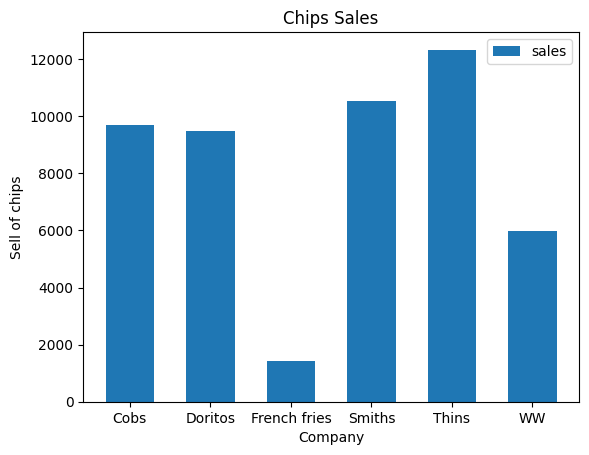

In [19]:
#plotting the graph
plt.xlabel(('Company'))
plt.ylabel(('Sell of chips'))
plt.bar(com,count,label='sales',width=0.6)
plt.title("Chips Sales")
plt.legend()


In [11]:
Total_count=count_for_Cobs+count_for_Doritos+count_for_chips_7+count_for_Smiths+count_for_Thins+count_for_WW
print("Total count for chips=",Total_count)

Total count for chips= 49441


In [12]:
#ratio for chips purchase
Chips_ratio=(Total_count/(transaction_data["TOT_SALES"].count()))
print("Chips purchase ratio=",Chips_ratio)

Chips purchase ratio= 0.18668534489268832


In [22]:
#dataset for the purchase behaviour
purchase_behaviour_data=pd.DataFrame(purchase_behaviour)


In [23]:
#checking the null values of the purchase beaviour dataset
purchase_behaviour_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [24]:
#getting the data type of each attribute of the purchase beaviour dataset
purchase_behaviour_data.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [25]:
#getting the information of the purchase behavior dataset
purchase_behaviour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
#getting the unque values of a=each attribute of the purchase behaviour dataset
for i in purchase_behaviour_data.columns:
  print(i,':','\n',purchase_behaviour_data[i].unique())

LYLTY_CARD_NBR : 
 [   1000    1002    1003 ... 2370751 2370961 2373711]
LIFESTAGE : 
 ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
PREMIUM_CUSTOMER : 
 ['Premium' 'Mainstream' 'Budget']


In [27]:
#getting the statistical data of the purchase behaviour dataset
purchase_behaviour_data.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [14]:
#fetching different lifestage from purchase_behaviour file
lifestage=purchase_behaviour_data.groupby('LIFESTAGE')
print(lifestage)
#SINGLES/COUPLES
lifestage_1=lifestage.get_group("YOUNG SINGLES/COUPLES")
YS=pd.DataFrame(lifestage_1)
print(YS)
lifestage_2=lifestage.get_group("OLDER SINGLES/COUPLES")
OS=pd.DataFrame(lifestage_2)
print(OS)
lifestage_3=lifestage.get_group("MIDAGE SINGLES/COUPLES")
MS=pd.DataFrame(lifestage_3)
print(MS)


       LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER
0                1000  YOUNG SINGLES/COUPLES          Premium
1                1002  YOUNG SINGLES/COUPLES       Mainstream
5                1007  YOUNG SINGLES/COUPLES           Budget
7                1010  YOUNG SINGLES/COUPLES       Mainstream
12               1018  YOUNG SINGLES/COUPLES       Mainstream
...               ...                    ...              ...
72612         2330041  YOUNG SINGLES/COUPLES       Mainstream
72622         2330311  YOUNG SINGLES/COUPLES           Budget
72623         2330321  YOUNG SINGLES/COUPLES       Mainstream
72629         2370181  YOUNG SINGLES/COUPLES       Mainstream
72636         2373711  YOUNG SINGLES/COUPLES       Mainstream

[14441 rows x 3 columns]
       LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER
3                1004  OLDER SINGLES/COUPLES       Mainstream
8                1011  OLDER SINGLES/COUPLES       Mainstream
13               1019  OLDER SINGLES/COUPLES

In [15]:
#FAMILES
lifestage_4=lifestage.get_group("YOUNG FAMILIES")
YF=pd.DataFrame(lifestage_4)
print(YF)
lifestage_5=lifestage.get_group("OLDER FAMILIES")
OF=pd.DataFrame(lifestage_5)
print(OF)
lifestage_6=lifestage.get_group("NEW FAMILIES")
NF=pd.DataFrame(lifestage_6)
print(NF)

       LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER
2                1003  YOUNG FAMILIES           Budget
18               1025  YOUNG FAMILIES           Budget
25               1039  YOUNG FAMILIES       Mainstream
27               1043  YOUNG FAMILIES           Budget
28               1044  YOUNG FAMILIES       Mainstream
...               ...             ...              ...
72605          861961  YOUNG FAMILIES           Budget
72606          862501  YOUNG FAMILIES           Budget
72620         2330271  YOUNG FAMILIES       Mainstream
72633         2370701  YOUNG FAMILIES       Mainstream
72634         2370751  YOUNG FAMILIES          Premium

[9178 rows x 3 columns]
       LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER
9                1012  OLDER FAMILIES       Mainstream
11               1016  OLDER FAMILIES       Mainstream
15               1022  OLDER FAMILIES           Budget
20               1027  OLDER FAMILIES          Premium
24               1038  OLDER FAMILIES   

In [16]:
#RETIRES
lifestage_7=lifestage.get_group("RETIREES")
R=pd.DataFrame(lifestage_7)
print(R)


       LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
10               1013  RETIREES           Budget
22               1030  RETIREES       Mainstream
23               1034  RETIREES          Premium
36               1055  RETIREES       Mainstream
48               1074  RETIREES           Budget
...               ...       ...              ...
72614         2330081  RETIREES       Mainstream
72615         2330121  RETIREES           Budget
72616         2330171  RETIREES       Mainstream
72619         2330251  RETIREES           Budget
72624         2330331  RETIREES           Budget

[14805 rows x 3 columns]
